# Multiple Linear Regression Analysis: Advertising Impact on Sales

This notebook demonstrates how advertising spending across different media channels (TV, Radio, and Newspaper) affects sales. We'll use this as an introduction to multiple linear regression analysis.

## Setup and Data Loading

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Set the data source
url = ("https://raw.githubusercontent.com/qcversity/"
       "ml-datasets/main/introduction-to-statistical-learning/Advertising.csv")


# read the data 
data = pd.read_csv(url)

In [5]:
# Display first few rows and basic information
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
print("\nBasic dataset information:")
display(data.info())


Basic dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


None

In [10]:
# drop variable
data = data.drop(columns = ['Unnamed: 0'])

In [11]:
print("\nSummary statistics:")
display(data.describe())


Summary statistics:


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

Before running our regression, let's visualize the relationships between our variables.

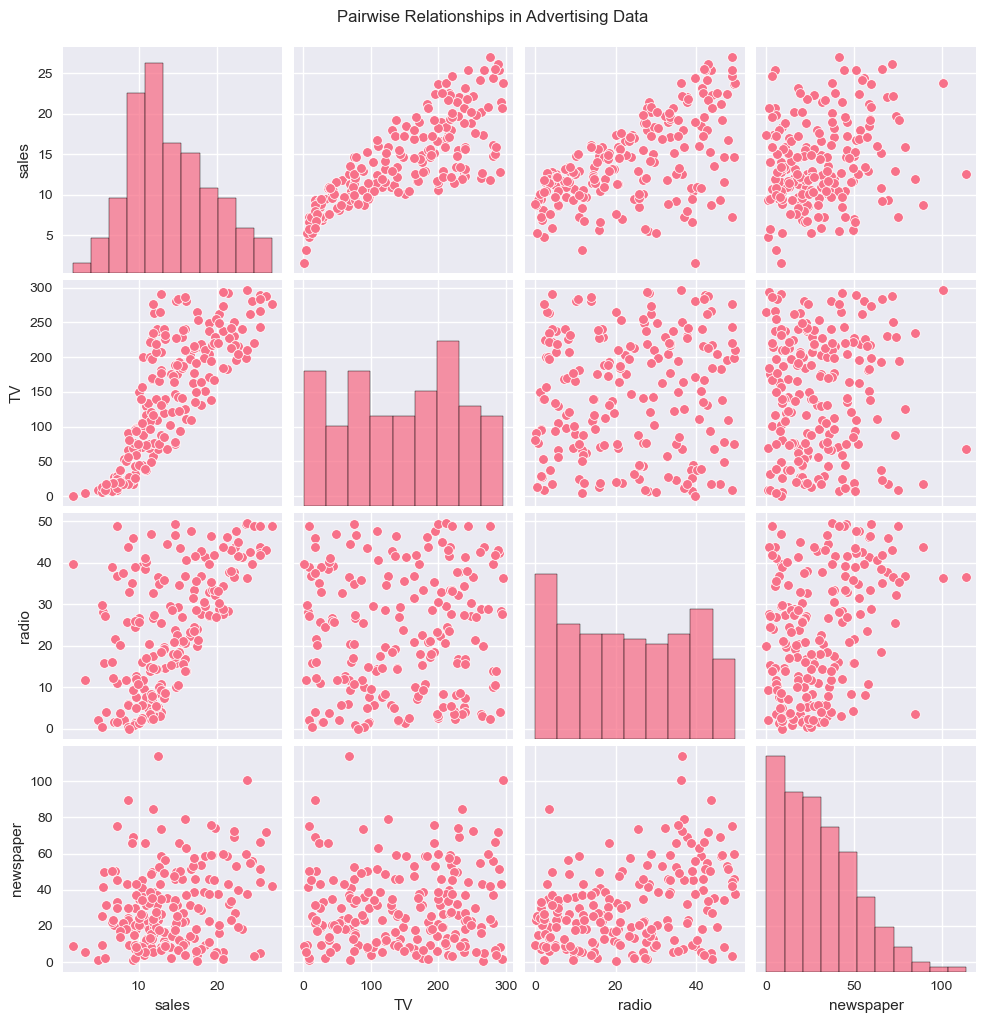

In [12]:
# Create a pairplot to visualize relationships
sns.pairplot(data, vars=['sales', 'TV', 'radio', 'newspaper'])
plt.suptitle('Pairwise Relationships in Advertising Data', y=1.02)
plt.show()

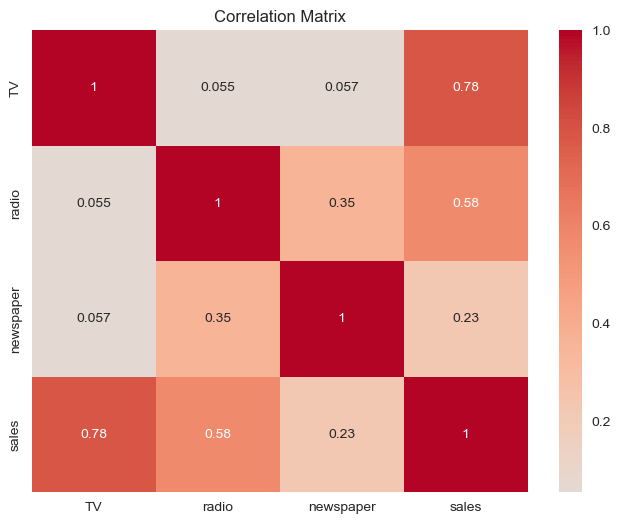

In [13]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Multiple Linear Regression Analysis

Now we'll fit a multiple linear regression model to predict sales based on advertising spending.

In [15]:
# Prepare the data for regression
X = data[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)                 # Add constant term
y = data['sales']

In [16]:
# Fit the model
model = sm.OLS(y, X).fit()

In [17]:
# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        19:44:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

## Model Diagnostics

Let's check if our model satisfies the key assumptions of linear regression.

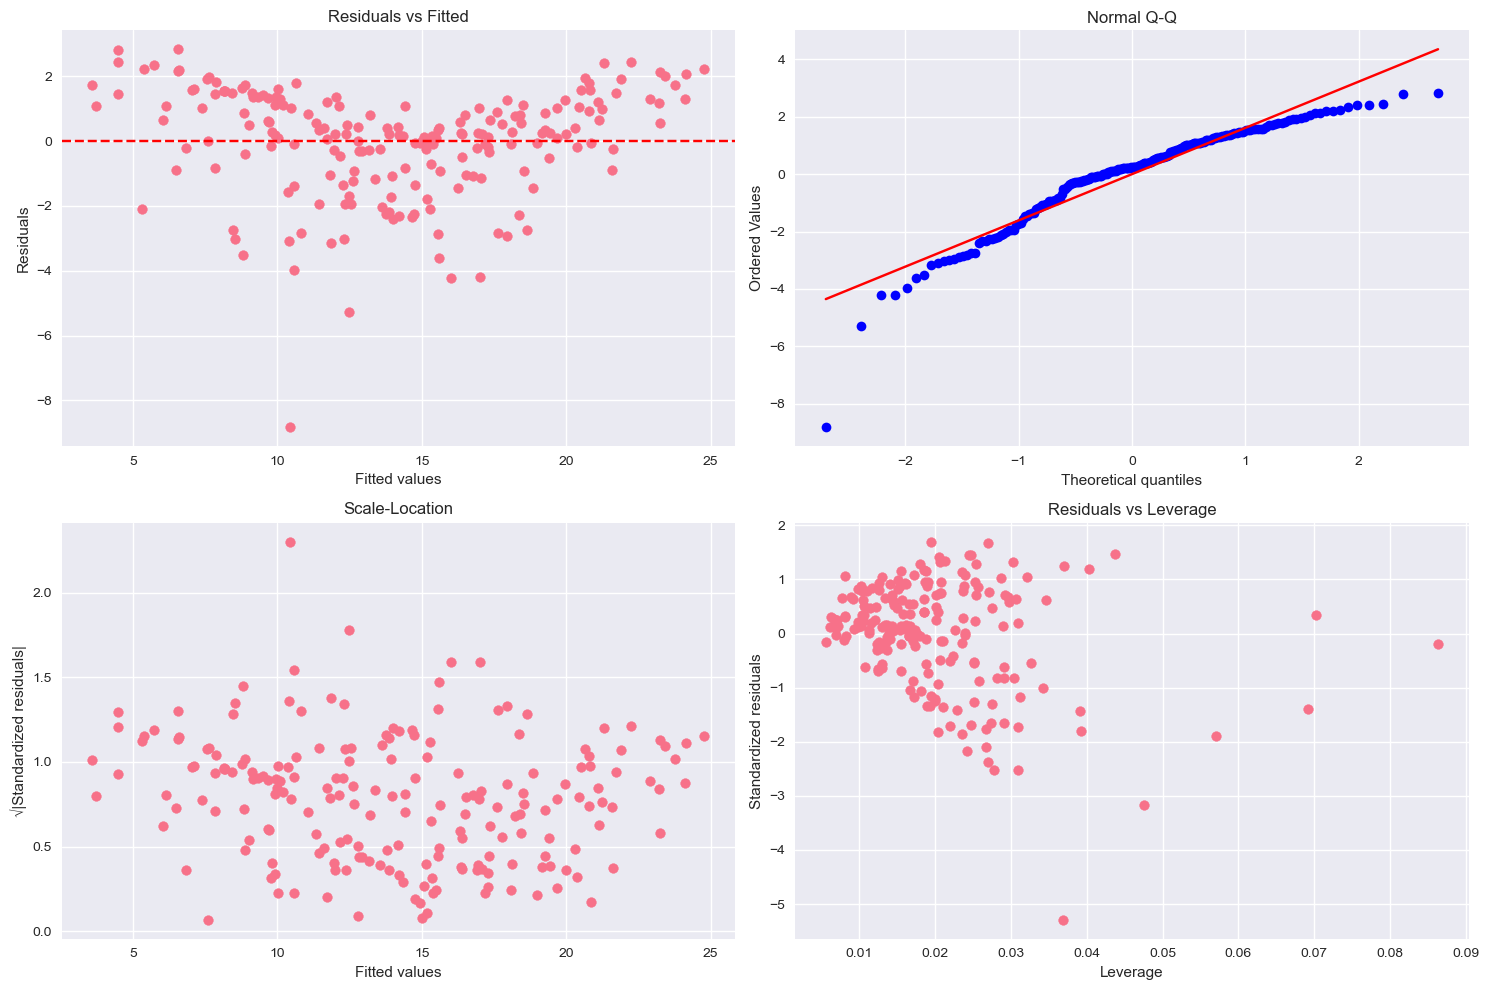

In [18]:
# Create diagnostic plots

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Residuals vs Fitted
fitted_vals = model.fittedvalues
residuals = model.resid
ax1.scatter(fitted_vals, residuals)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

# 2. Normal Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q')

# 3. Scale-Location
standardized_residuals = np.sqrt(np.abs(stats.zscore(residuals)))
ax3.scatter(fitted_vals, standardized_residuals)
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('√|Standardized residuals|')
ax3.set_title('Scale-Location')

# 4. Leverage plot
influence = model.get_influence()
leverage = influence.hat_matrix_diag
ax4.scatter(leverage, stats.zscore(residuals))
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Standardized residuals')
ax4.set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()


# diagnostic_plots(model, X, y)

## Interpreting the Results

Let's break down our findings:

1. **Model Fit**:
   - R-squared: 0.897 - Our model explains 89.7% of the variance in sales
   - Adjusted R-squared: 0.896

2. **Coefficients**:
   - TV: `0.046` - For each `$1000` increase in TV advertising, sales increase by `$0.046k`
   - Radio: `0.189` - For each `$1000` increase in Radio advertising, sales increase by `$0.189k`
   - Newspaper: `0.001` - For each `$1000` increase in Newspaper advertising, sales increase by `$0.001k`

3. **Statistical Significance**:
   - TV and Radio advertising have highly significant effects (p < 0.05)
   - Newspaper advertising shows less statistical significance

4. **Diagnostics**:
   - Residuals appear fairly normally distributed
   - Some heteroscedasticity might be present
   - No significant leverage points identified